Linear regression 종속 변수 y 독립변수 x들.

In [67]:
import sympy
import numpy
from matplotlib import pyplot
%matplotlib inline
sympy.init_printing()

In [68]:
w = sympy.Symbol('w',real = True)

f = w**2 + 3*w - 5
f

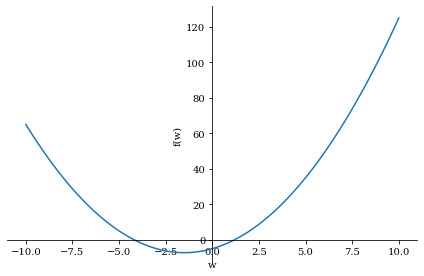

In [69]:
sympy.plotting.plot(f)

In [70]:
fprime = f.diff(w)
fprime

In [71]:
sympy.solve(fprime,w)

In [72]:
fpnum = sympy.lambdify(w,fprime)
type(fpnum)

function

In [73]:
w= 10.0

for i in range(1000):
    w=w-fpnum(w)*0.01
print(w)

-1.4999999806458753


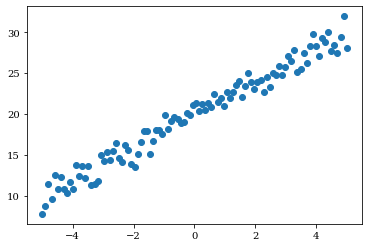

In [74]:
x_data = numpy.linspace(-5,5,100)
w_true = 2
b_true = 20

y_data = w_true * x_data + b_true + numpy.random.normal(size=len(x_data))

pyplot.scatter(x_data,y_data)

In [75]:
x_data.shape

In [76]:
y_data.shape

In [77]:
w,b,x,y = sympy.symbols("w b x y")

cost_function = (w*x + b - y) ** 2
cost_function

In [78]:
grad_b = sympy.lambdify([w,b,x,y],cost_function.diff(b),"numpy")
grad_w = sympy.lambdify([w,b,x,y],cost_function.diff(w),"numpy")

In [79]:
w=0
b=0

for i in range(1000):
    descent_b = numpy.sum(grad_b(w,b,x_data,y_data))/len(x_data)
    descent_w = numpy.sum(grad_w(w,b,x_data,y_data))/len(x_data)
    w = w-descent_w*0.01
    b = b-descent_b*0.01
print(w)
print(b)

2.0045904578849316
19.952511824956687


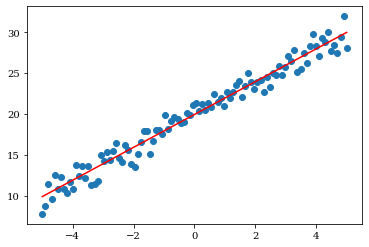

In [80]:
pyplot.scatter(x_data,y_data)
pyplot.plot(x_data,w*x_data+b,"-r")

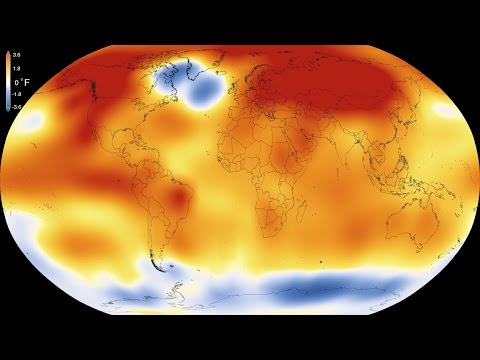

In [81]:
from IPython.display import YouTubeVideo
YouTubeVideo("gGOzHVUQCw0")

In [82]:
from urllib.request import urlretrieve
URL = "http://go.gwu.edu/engcomp1data5?accessType-DOWNLOAD"
urlretrieve(URL,"land_global_temperature_anomaly-1880-2016.csv")

('land_global_temperature_anomaly-1880-2016.csv',
 <http.client.HTTPMessage at 0x246b2abf208>)

In [83]:
import numpy

In [84]:
fname = "land_global_temperature_anomaly-1880-2016.csv"

year,temp_anomaly = numpy.loadtxt(fname,delimiter=",",skiprows=5,unpack=True)

In [85]:
from matplotlib import pyplot
%matplotlib inline

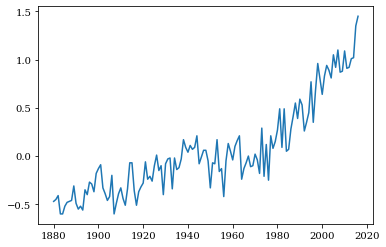

In [86]:
pyplot.plot(year,temp_anomaly);

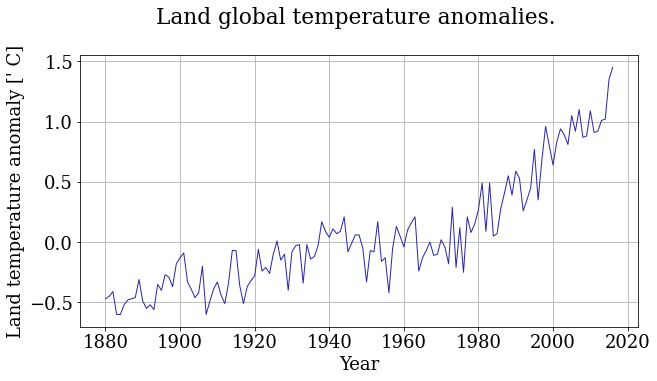

In [87]:
pyplot.rc("font",family="serif",size="18")

pyplot.figure(figsize = (10,5))

pyplot.plot(year,temp_anomaly,color="#2929a3",linestyle="-",linewidth=1)
pyplot.title("Land global temperature anomalies. \n")
pyplot.xlabel("Year")
pyplot.ylabel("Land temperature anomaly [' C]")
pyplot.grid();

In [88]:
w = numpy.sum(temp_anomaly*(year-year.mean())) / numpy.sum(year*(year-year.mean()))
b=a_0=temp_anomaly.mean() - w*year.mean()

print(w)
print(b)

0.01037028394347266
-20.148685384658464


In [89]:
reg = b + w * year

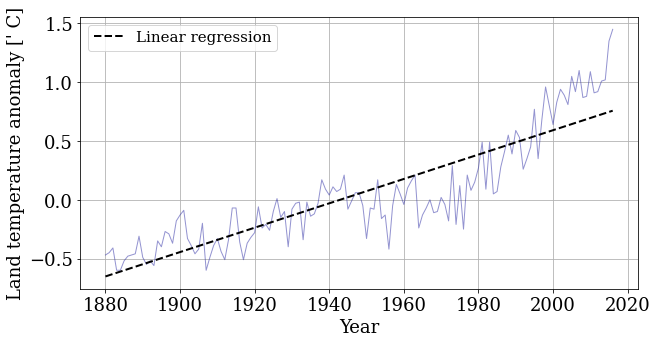

In [90]:
pyplot.figure(figsize=(10,5))

pyplot.plot(year,temp_anomaly,color="#2929a3",linestyle="-",linewidth=1,alpha=0.5)
pyplot.plot(year,reg,"k--",linewidth=2,label="Linear regression")
pyplot.xlabel("Year")
pyplot.ylabel("Land temperature anomaly [' C]")
pyplot.legend(loc = "best",fontsize=15)
pyplot.grid();